In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# import

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from scipy.stats import pearsonr
%matplotlib inline

In [3]:
movie_dates_df = pd.read_csv('/content/drive/MyDrive/section2/project/final/data/movie_release_dates.csv', index_col=0)
theaters_df = pd.read_csv('/content/drive/MyDrive/section2/project/final/data/movie_theater_data.csv', index_col=0)
awards_df = pd.read_csv('/content/drive/MyDrive/section2/project/final/data/movie_awards.csv', index_col=0)
actors_df = pd.read_csv('/content/drive/MyDrive/section2/project/final/data/Actors_Table.csv')
directors_df = pd.read_csv('/content/drive/MyDrive/section2/project/final/data/Directors_Table.csv')
imdb_base_df = pd.read_csv('/content/drive/MyDrive/section2/project/final/data/IMDb_base.csv')
imdb_budgets_df = pd.read_csv('/content/drive/MyDrive/section2/project/final/data/IMDb_budgets.csv')
studio_df = pd.read_csv('/content/drive/MyDrive/section2/project/final/data/studiodf.csv')

In [4]:
imdb_budgets_df = imdb_budgets_df[imdb_budgets_df['Domestic Gross'] !=0]

In [5]:
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564
1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337
2,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376
3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754
4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395


In [6]:
movie_dates_df.head()

,movie,release_date,release_month,release_day,release_year
0,Metropolis,1927-03-06,March,Sunday,1927
1,"Dr. Mabuse, the Gambler",1927-08-08,August,Monday,1927
2,The Unknown,1927-06-03,June,Friday,1927
3,The Jazz Singer,1927-10-06,October,Thursday,1927
4,Chicago,1927-12-23,December,Friday,1927


In [7]:
theaters_df.head()

,title,max_theaters,year,total_dom_gross($),studio
0,The Lion King,4802,2019,543638043,Disney
1,Avengers: Endgame,4662,2019,858373000,Disney
2,Spider-Man: Far from Home,4634,2019,390532085,Sony
3,Toy Story 4,4575,2019,434038008,Disney
4,It Chapter Two,4570,2019,211593228,Warner Bros.


In [8]:
actors_df.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Robert Downey Jr.,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Chris Evans,"Apr 23, 2019",400000000,858373000,2797800564
2,Avengers: Endgame,2019,Mark Ruffalo,"Apr 23, 2019",400000000,858373000,2797800564
3,Avengers: Endgame,2019,Chris Hemsworth,"Apr 23, 2019",400000000,858373000,2797800564
4,Avatar,2009,Sam Worthington,"Dec 17, 2009",237000000,760507625,2788701337


In [9]:
directors_df.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Joe Russo,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Anthony Russo,"Apr 23, 2019",400000000,858373000,2797800564
2,Avatar,2009,James Cameron,"Dec 17, 2009",237000000,760507625,2788701337
3,Black Panther,2018,Ryan Coogler,"Feb 13, 2018",200000000,700059566,1346103376
4,Avengers: Infinity War,2018,Joe Russo,"Apr 25, 2018",300000000,678815482,2048359754


In [10]:
imdb_base_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre
0,Star Wars: Episode VII - The Force Awakens,2015,7.9,PG-13,138,"Action, Adventure, Sci-Fi"
1,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama"
2,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy"
3,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi"
4,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi"


In [11]:
studio_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,Buena Vista,415000000.0,652000000,2010
1,Alice in Wonderland (2010),Buena Vista,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,Pixar/Dreamworks,238700000.0,513900000,2010


# **Q1**: 흥행 성적이 가장 좋았던 영화는 무엇일까요?

## 예산과 수익을 비교합니다.

In [12]:
imdb_budgets_df['Profit'] = imdb_budgets_df['Worldwide Gross'] - imdb_budgets_df['Production Budget']

imdb_budgets_df['Profit_Margin'] = (imdb_budgets_df['Worldwide Gross'] - 
                                    imdb_budgets_df['Production Budget'])/imdb_budgets_df['Worldwide Gross']

In [13]:
imdb_budgets_df['Adjusted_Budget'] = ((((2022-imdb_budgets_df['Year'])*.0322)+1)*
                                      imdb_budgets_df['Production Budget'])
imdb_budgets_df['Adjusted_Profit'] = (((2022-imdb_budgets_df['Year'])*.0322)+1)*imdb_budgets_df['Profit']
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.857031,438640000.0,2.629428e+09
1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.915014,336208200.0,3.619844e+09
2,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376,1146103376,0.851423,225760000.0,1.293721e+09
3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.853541,338640000.0,1.973548e+09
4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.909429,361000000.0,3.624816e+09


In [14]:
profitable_movies_df = imdb_budgets_df.loc[imdb_budgets_df['Profit'] > 0]
profitable_ranked_df = profitable_movies_df.sort_values(by=['Adjusted_Profit'], ascending=False)
profitable_ranked_df.reset_index(inplace=True)
profitable_ranked_df.head()

,index,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.909429,361000000.0,3.624816e+09
1,1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.915014,336208200.0,3.619844e+09
2,0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.857031,438640000.0,2.629428e+09
3,3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.853541,338640000.0,1.973548e+09
4,28,Jurassic Park,1993,8.1,PG-13,127,"Action, Adventure, Sci-Fi","Jun 11, 1993",63000000,402523348,1045627627,982627627,0.939749,121829400.0,1.900205e+09


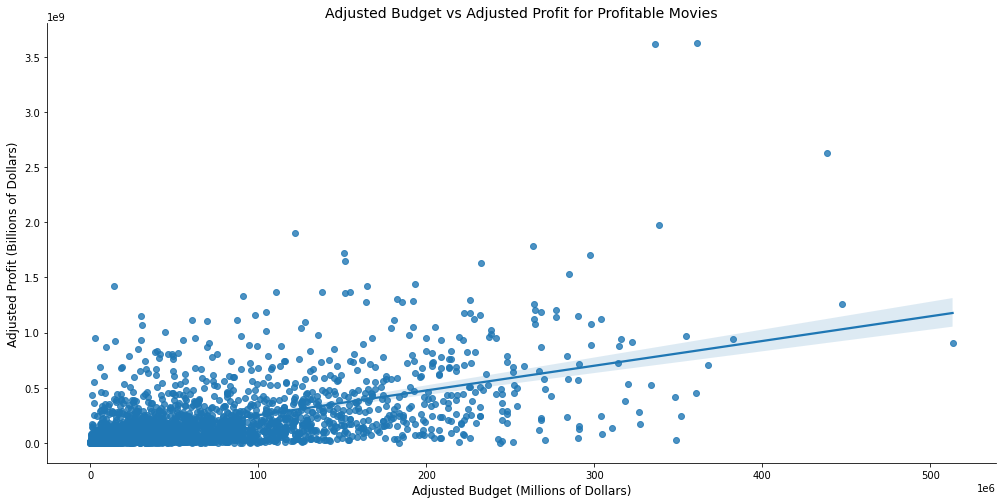

In [15]:
ax1 = sns.lmplot(x='Adjusted_Budget', y='Adjusted_Profit', data=profitable_ranked_df, height=7, aspect=2)
plt.xlabel('Adjusted Budget (Millions of Dollars)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Adjusted Profit (Billions of Dollars)', fontsize=12)
plt.title('Adjusted Budget vs Adjusted Profit for Profitable Movies', fontsize=14)
plt.savefig('BudgetVProfit');

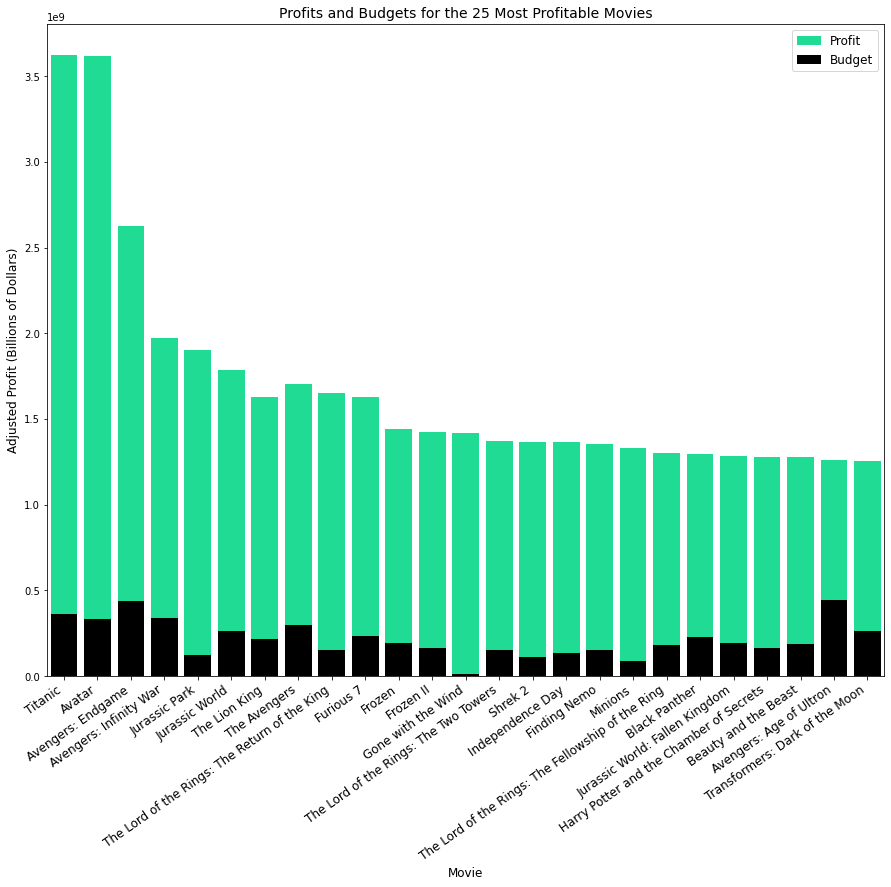

In [16]:
plt.figure(figsize=(15,12))
sns.barplot(x=profitable_ranked_df.loc[0:25, 'Movie'],y=profitable_ranked_df.loc[0:25, 'Adjusted_Profit'], 
            color='mediumspringgreen', label='Profit', ci=None)
sns.barplot(x=profitable_ranked_df.loc[0:25, 'Movie'],y=profitable_ranked_df.loc[0:25, 'Adjusted_Budget'], 
            color='black', label='Budget', ci=None)
plt.xlabel('Movie', fontsize=12)
plt.title("Profits and Budgets for the 25 Most Profitable Movies", fontsize=14)
plt.ylabel('Adjusted Profit (Billions of Dollars)', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('ProfitBudgetTop25');

In [17]:
profitable_movies_df['Adjusted_Budget'].describe()

count    2.836000e+03
mean     6.348875e+07
std      6.628569e+07
min      1.105720e+04
25%      1.735880e+07
50%      4.029500e+07
75%      8.557200e+07
max      5.132418e+08
Name: Adjusted_Budget, dtype: float64

In [18]:
profitable_movies_df.loc[0:24, 'Adjusted_Budget'].describe()

count    2.500000e+01
mean     2.560475e+08
std      8.504336e+07
min      1.105720e+08
25%      1.918960e+08
50%      2.386400e+08
75%      2.983000e+08
max      4.472710e+08
Name: Adjusted_Budget, dtype: float64

In [19]:
profitable_movies_df['Profit_Margin'].describe()

count    2836.000000
mean        0.621489
std         0.240466
min         0.000265
25%         0.465466
50%         0.671426
75%         0.809796
max         0.997599
Name: Profit_Margin, dtype: float64

In [20]:
profitable_movies_df.loc[0:24, 'Profit_Margin'].describe()

count    25.000000
mean      0.846165
std       0.046107
min       0.738557
25%       0.813675
50%       0.849688
75%       0.871288
max       0.925154
Name: Profit_Margin, dtype: float64

In [21]:
len(profitable_ranked_df.loc[profitable_ranked_df['Profit_Margin'] > 0.5])

2041

**결과**<br/>
25개 영화가 높은 흥행 성적을 기록했습니다.
> Titanic (1997), Avatar, Avengers: Endgame은 엄청난 순익을 거두는 데 성공한 영화입니다.

## 그렇다면 제작비로 얼마나 사용해야 할까요?

흥행에 성공한 영화 2841편 중 2043편이 50%가 넘는 수익률을 기록했습니다.
- 상위 25개 영화의 수익률은 84.9%, 예산의 중앙값은 \$ 225,760,000 입니다.
- 전체 영화로 바꿔 생각했을 때, 수익률은 67.1%, 예산 중앙값은 $ 38,676,000 으로 떨어집니다.
  - 이상치 때문에 평균이 편향된 값을 보여주고 있으므로, 중앙값(median)을 기준으로 데이터를 살펴보아야 합니다.

따라서, 75% 이상의 이윤과 $ 38,676,000 이상의 예산으로 데이터를 필터링하겠습니다.

In [22]:
filtered_df = profitable_ranked_df.loc[(profitable_ranked_df['Profit_Margin'] >= 0.75) & 
                         (profitable_ranked_df['Adjusted_Budget'] > 38676000)]
len(filtered_df)

390

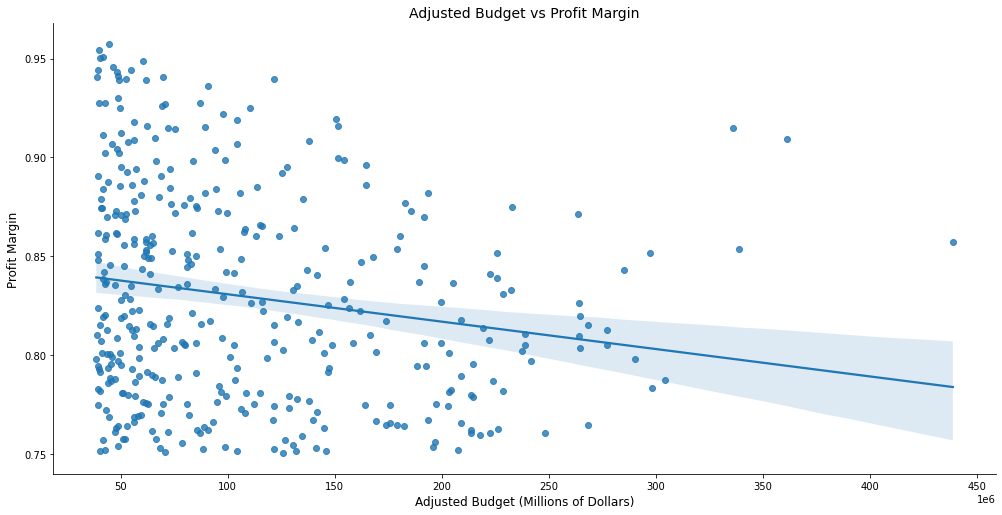

In [23]:
ax2 = sns.lmplot(x='Adjusted_Budget', y='Profit_Margin', data=filtered_df, height=7, aspect=2)
plt.xlabel('Adjusted Budget (Millions of Dollars)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Adjusted Budget vs Profit Margin', fontsize=14)
plt.savefig('BudgetVMargin');

In [24]:
filtered_df.describe()

,index,Year,IMDb,Runtime,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
count,390.000000,390.000000,390.000000,390.000000,3.900000e+02,3.900000e+02,3.900000e+02,3.900000e+02,390.000000,3.900000e+02,3.900000e+02
mean,406.451282,2004.961538,7.015385,118.120513,7.571155e+07,1.901486e+08,4.750805e+08,3.993690e+08,0.829671,1.079449e+08,5.789773e+08
std,390.707481,10.763456,0.900140,23.769963,5.729578e+07,1.263373e+08,3.742188e+08,3.268036e+08,0.053467,6.984178e+07,4.299728e+08
min,0.000000,1956.000000,3.300000,79.000000,1.350000e+07,1.901988e+07,6.999538e+07,5.499538e+07,0.750282,3.868500e+07,1.228145e+08
25%,116.250000,1998.000000,6.400000,100.000000,3.500000e+07,1.053208e+08,2.124044e+08,1.689688e+08,0.784807,5.367960e+07,2.800380e+08
50%,287.500000,2007.000000,7.000000,115.000000,5.500000e+07,1.613669e+08,3.477261e+08,2.928029e+08,0.819727,8.276700e+07,4.618923e+08
75%,559.500000,2014.000000,7.700000,131.000000,9.475000e+07,2.376227e+08,6.311217e+08,5.058033e+08,0.870507,1.444630e+08,7.487077e+08
max,2424.000000,2020.000000,9.000000,228.000000,4.000000e+08,8.583730e+08,2.797801e+09,2.551701e+09,0.957496,4.386400e+08,3.624816e+09


**결과**

산점도를 봤을 때 훨씬 분산되어 있는 것을 확인할 수 있습니다. 특히 예산이 증가할수록 수익은 떨어지는 특징을 살펴볼 수 있습니다.

필터링한 데이터를 보면 예산의 중앙값은 $ 82,249,300, 마진의 중앙값은 81.9% 입니다.

따라서 미국을 기준으로 새로운 영화를 만들때 $ 82,249,300 예산으로 제작해야 80% 이상의 마진을 기대할 수 있습니다.

# **Q2**: 수익을 거두려면 어떤 장르로 제작해야 할까요?

In [25]:
imdb_budgets_df['Genre'] = imdb_budgets_df['Genre'].str.split(', ')
imdb_budgets_df1 = imdb_budgets_df['Genre'].apply(pd.Series)
imdb_budgets_df2 = pd.merge(imdb_budgets_df, imdb_budgets_df1, right_index = True, left_index = True)
imdb_budgets_df3 = imdb_budgets_df2.drop(['Genre'], axis = 1)
genre_budgets_df = imdb_budgets_df3.melt(id_vars=['Movie', 'Year'], value_vars=[0, 1, 2] ,var_name = ['X'])
genre_budgets_df = pd.merge(genre_budgets_df, imdb_budgets_df)
genre_budgets_df = genre_budgets_df.drop(['Genre', 'X'], axis=1)
genre_budgets_df = genre_budgets_df.drop_duplicates()
genre_budgets_df = genre_budgets_df.rename(columns={'value': 'Genre'})
genre_budgets_df = genre_budgets_df.dropna()

In [26]:
m_by_genre = genre_budgets_df.groupby('Genre', as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)

In [27]:
m_by_genre

,Genre,Movie
6,Drama,1876
4,Comedy,1444
0,Action,1045
1,Adventure,834
5,Crime,689
15,Romance,622
18,Thriller,615
11,Horror,410
14,Mystery,356
16,Sci-Fi,330


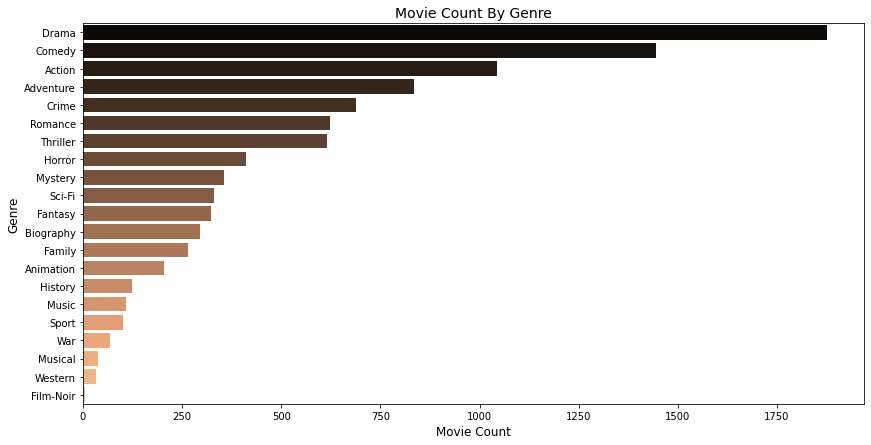

In [28]:
plt.figure(figsize=(14,7))
ax3 = sns.barplot(x=m_by_genre['Movie'], y=m_by_genre['Genre'], palette='copper')
plt.xlabel('Movie Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Movie Count By Genre', fontsize=14)
plt.savefig('CountGenre');

드라마와 코미디, 액션 장르가 다수를 차지하고 있습니다.

하지만 이 장르가 가장 수익성이 높은 장르일까요?

각 장르별 평균 순이익을 살펴보겠습니다.

In [29]:
p_by_genre = genre_budgets_df.groupby('Genre', as_index=False)[['Adjusted_Profit', 'Profit_Margin']].median().sort_values(by='Adjusted_Profit', ascending=False)

In [30]:
p_by_genre

,Genre,Adjusted_Profit,Profit_Margin
2,Animation,2.140330e+08,0.681316
1,Adventure,1.298395e+08,0.610306
16,Sci-Fi,7.985269e+07,0.596241
7,Family,7.817023e+07,0.582691
0,Action,6.723431e+07,0.519977
8,Fantasy,5.661779e+07,0.542261
18,Thriller,4.962460e+07,0.595092
13,Musical,4.796317e+07,0.652690
14,Mystery,4.173005e+07,0.614036
11,Horror,4.118880e+07,0.670497


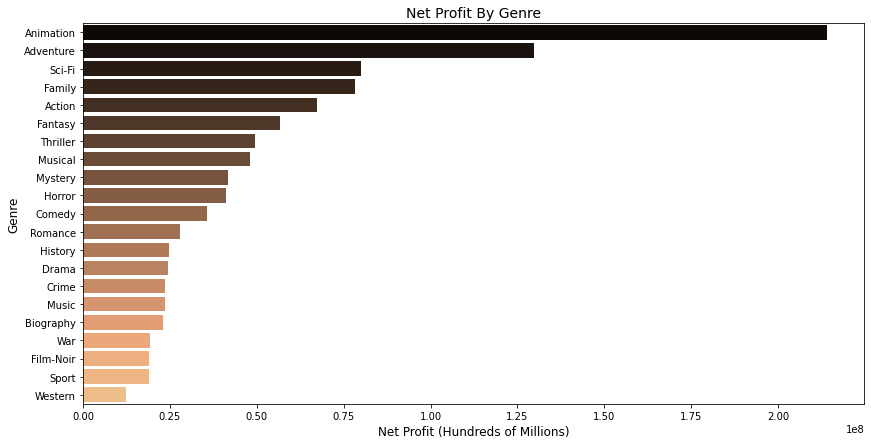

In [31]:
plt.figure(figsize=(14,7))
ax4 = sns.barplot(x=p_by_genre['Adjusted_Profit'], y=p_by_genre['Genre'], palette='copper')
plt.xlabel('Net Profit (Hundreds of Millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Net Profit By Genre', fontsize=14)
plt.savefig('NetProfitGenre');

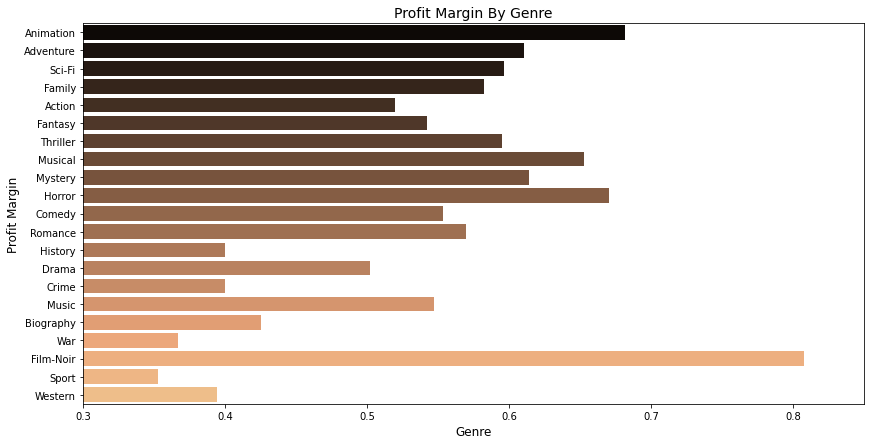

In [32]:
plt.figure(figsize=(14,7))
ax5 = sns.barplot(x=p_by_genre['Profit_Margin'], y=p_by_genre['Genre'], palette='copper')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Profit Margin By Genre', fontsize=14)
plt.xlim(0.3, 0.85)
plt.savefig('ProfitMarginGenre');

누아르 장르가 0.8 이상의 수익률을 기록했지만 6편의 영화로 나타난 결과이기 때문에 이상치로 생각할 수 있습니다.

애니메이션, 어드벤쳐, SF 장르가 순이익 측면에서 가장 큰 성공을 거두는 것으로 나타났습니다.

In [33]:
per_by_genre = genre_budgets_df.groupby(['Genre'],  as_index=False)['Adjusted_Profit'].sum().sort_values(by='Adjusted_Profit', ascending=False)
per_by_genre['Percent Total of Net Profit'] = (per_by_genre['Adjusted_Profit']/per_by_genre['Adjusted_Profit'].sum()*100).round(2)
per_by_genre

,Genre,Adjusted_Profit,Percent Total of Net Profit
1,Adventure,2.276834e+11,18.10
0,Action,1.873273e+11,14.90
4,Comedy,1.588404e+11,12.63
6,Drama,1.512358e+11,12.03
16,Sci-Fi,7.383939e+10,5.87
2,Animation,7.200294e+10,5.73
18,Thriller,6.829419e+10,5.43
8,Fantasy,5.730390e+10,4.56
15,Romance,5.258899e+10,4.18
7,Family,4.803880e+10,3.82


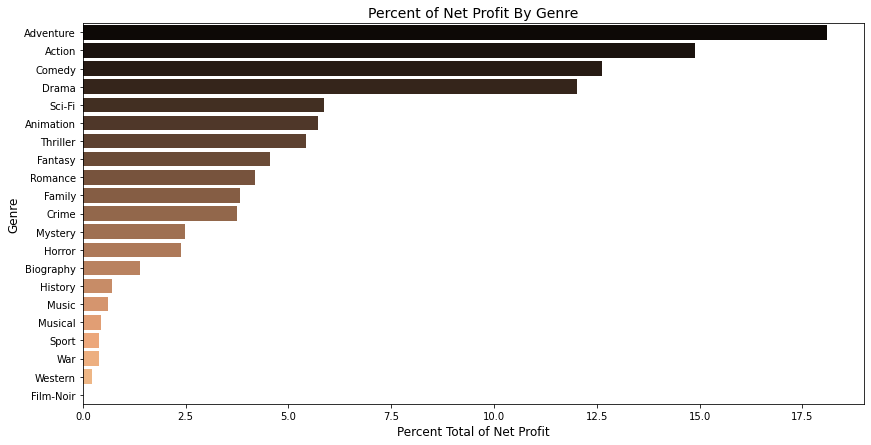

In [34]:
plt.figure(figsize=(14,7))
ax6 = sns.barplot(x=per_by_genre['Percent Total of Net Profit'], y=per_by_genre['Genre'], palette='copper')
plt.xlabel('Percent Total of Net Profit', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Percent of Net Profit By Genre', fontsize=14)
plt.savefig('PercentProfitGenre');

전체 순이익 측면에서 볼 때, 어드벤쳐, 액션, 코미디, 드라마 장르가 순이익을 거두는 주요 장르로 볼 수 있습니다.

따라서 가장 수익성이 높은 6개 장르로 제작하는 것이 수익성 측면에서 안전하다고 볼 수 있습니다. 특히 SF와 애니메이션 장르는 평균 순이익이 높기 때문에 좀 더 무게를 두고 바라볼 필요가 있습니다.

# Q3: 어떤 시기에 개봉해야 할까요?

In [35]:
imdb_budgets_df['Release Date'] = pd.to_datetime(imdb_budgets_df['Release Date'])

In [36]:
dateData =  [x.strftime('%B') for x in imdb_budgets_df['Release Date']]
imdb_budgets_df['Month'] = dateData

In [37]:
m_by_month = imdb_budgets_df.groupby(['Month'], as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)
m_by_month

,Month,Movie
2,December,452
10,October,424
9,November,366
11,September,358
1,August,346
6,June,327
5,July,296
7,March,270
8,May,241
0,April,238


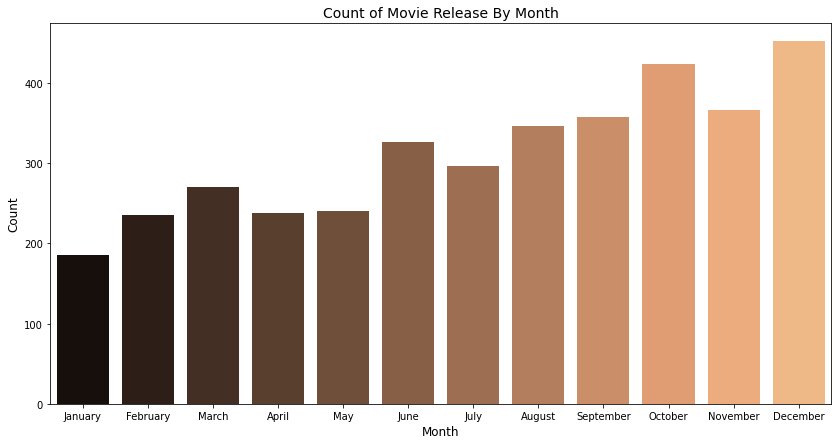

In [38]:
plt.figure(figsize=(14,7))
ax7 = sns.countplot(x=imdb_budgets_df['Month'], palette='copper',
                   order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Movie Release By Month', fontsize=14)
plt.savefig('CountbyMonth');

개봉된 영화 수로만 봤을 때는 10월과 12월이 개봉하기에 가장 적절한 시기라고 볼 수 있습니다.

수익성 측면에서도 그럴까요?

In [39]:
p_by_month = imdb_budgets_df.groupby('Month', as_index=False)[['Adjusted_Profit', 'Profit_Margin']].median().sort_values(by='Adjusted_Profit', ascending=False)
p_by_month

,Month,Adjusted_Profit,Profit_Margin
8,May,8.432427e+07,0.638093
6,June,8.270283e+07,0.642956
5,July,7.898318e+07,0.644061
2,December,5.947268e+07,0.587273
9,November,4.950163e+07,0.571790
3,February,4.316798e+07,0.563982
7,March,3.486420e+07,0.514524
0,April,3.276518e+07,0.541053
4,January,3.259567e+07,0.555721
1,August,2.622544e+07,0.522294


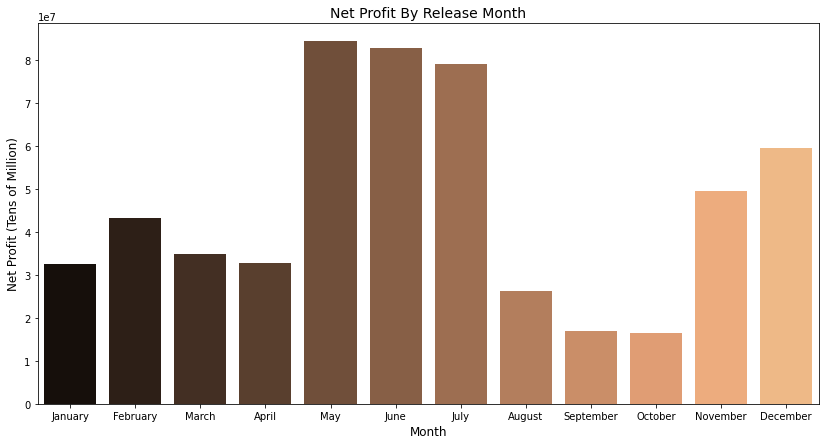

In [40]:
plt.figure(figsize=(14,7))
ax8 = sns.barplot(x=p_by_month['Month'], y=p_by_month['Adjusted_Profit'], palette='copper', 
                  order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Net Profit (Tens of Million)', fontsize=12)
plt.title('Net Profit By Release Month', fontsize=14)
plt.savefig('ProfitbyMonth');

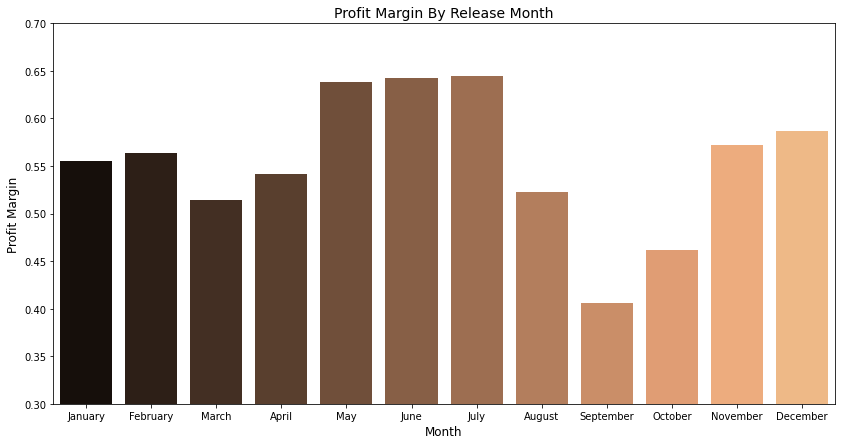

In [41]:
plt.figure(figsize=(14,7))
ax9 = sns.barplot(x=p_by_month['Month'], y=p_by_month['Profit_Margin'], palette='copper', 
                  order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Profit Margin By Release Month', fontsize=14)
plt.ylim(0.3, 0.7)
plt.savefig('MarginByMonth');

In [42]:
genre_budgets_df['Release Date'] = pd.to_datetime(genre_budgets_df['Release Date'])
genreDate =  [x.strftime('%B') for x in genre_budgets_df['Release Date']]
genre_budgets_df['Month'] = genreDate

In [43]:
month_genre = genre_budgets_df[['Genre', 'Month', 'Adjusted_Profit', 'Release Date']]
month_genre = month_genre.groupby(['Genre', 'Month'], as_index=False)['Adjusted_Profit'].mean().sort_values(by='Adjusted_Profit', ascending=False)

In [44]:
Adventure_df = month_genre.loc[month_genre['Genre'].str.contains('Adventure')]
Action_df = month_genre.loc[month_genre['Genre'].str.contains('Action')]
Comedy_df = month_genre.loc[month_genre['Genre'].str.contains('Comedy')]
Drama_df = month_genre.loc[month_genre['Genre'].str.contains('Drama')]
Scifi_df = month_genre.loc[month_genre['Genre'].str.contains('Sci-Fi')]
Animation_df = month_genre.loc[month_genre['Genre'].str.contains('Animation')]

In [45]:
genre_concat = [Adventure_df, Action_df, Comedy_df, Drama_df, Scifi_df, Animation_df]
month_genre_df = pd.concat(genre_concat)

In [46]:
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_genre_pivoted = month_genre_df.pivot(index='Month', columns='Genre', values='Adjusted_Profit').reindex(months_in_order)

In [47]:
month_genre_pivoted

Genre,Action,Adventure,Animation,Comedy,Drama,Sci-Fi
Month,,,,,,
January,7.132750e+07,1.070555e+08,2.690094e+08,7.383129e+07,4.518884e+07,8.989804e+07
February,1.135465e+08,1.570806e+08,2.847090e+08,8.183713e+07,6.690816e+07,1.307098e+08
March,1.338392e+08,2.106581e+08,2.522491e+08,8.496743e+07,5.460766e+07,1.805412e+08
April,2.735660e+08,3.918818e+08,1.423257e+08,5.234606e+07,8.114079e+07,4.231279e+08
May,3.136988e+08,3.943575e+08,6.146039e+08,1.965082e+08,1.006847e+08,3.989208e+08
June,2.766760e+08,4.108747e+08,6.172175e+08,1.837260e+08,1.168608e+08,3.838437e+08
July,2.689001e+08,2.939245e+08,3.424043e+08,1.471815e+08,1.245022e+08,2.738435e+08
August,8.280169e+07,8.520173e+07,1.112716e+08,5.505285e+07,6.827226e+07,8.473799e+07
September,5.548889e+07,9.799789e+07,1.616663e+08,5.578670e+07,4.194332e+07,1.164958e+08


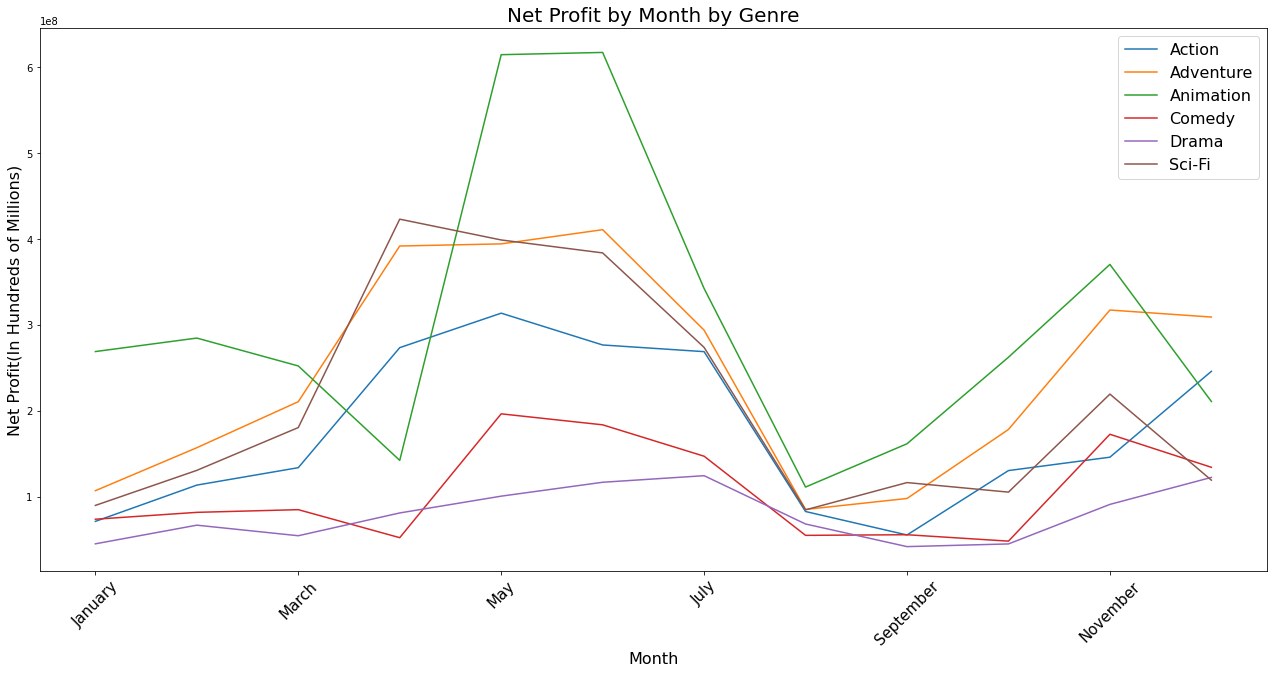

In [48]:
ax10 = month_genre_pivoted.plot(kind='line', figsize=(22, 10), rot=0)
plt.legend(prop={'size': 16})
plt.xlabel('Month', fontsize=16)
plt.ylabel('Net Profit(In Hundreds of Millions)', fontsize=16)
plt.title('Net Profit by Month by Genre', fontsize=20)
plt.xticks(fontsize=15, rotation=45)
plt.savefig('ProfitbyMonthbyGenre');

**결과**

위에서 살펴봤던 '순이익이 가장 많을 것으로 기대되는 장르 6개' 기준으로 봤을 때, 애니메이션 장르를 5월과 7월 사이에 개봉하는 것이 가장 수익을 많이 거둘 것으로 기대할 수 있습니다.

# Q4: 어떤 배우와 감독을 기용해야 할까요?

In [49]:
actors_df['Production Budget'] = (((2022-actors_df['Year'])*.0322)+1)*actors_df['Production Budget']
actors_df['Worldwide Gross'] = (((2022-actors_df['Year'])*.0322)+1)*actors_df['Worldwide Gross']
actors_df['Domestic Gross'] = (((2022-actors_df['Year'])*.0322)+1)*actors_df['Domestic Gross']

In [50]:
actors_df['Net Profit'] = actors_df['Worldwide Gross'] - actors_df['Production Budget']
actors_df['Profit Margin'] = actors_df['Net Profit'] / actors_df['Worldwide Gross']

In [51]:
actor_counts = actors_df['value'].value_counts()
actor_list = actor_counts[actor_counts >= 10].index.tolist()
actors_df = actors_df[actors_df['value'].isin(actor_list)]

In [52]:
actor_total = actors_df.groupby(['value'],  as_index=False)['Net Profit'].mean().sort_values(by='Net Profit', ascending=False)
actor_total['VAR'] = (actor_total['Net Profit']/actor_total['Net Profit'].mean())

In [53]:
top_actors = actor_total.head(25)
top_actors

,value,Net Profit,VAR
113,Ian McKellen,6.720441e+08,4.560999
88,Emma Watson,6.221193e+08,4.222172
48,Chris Hemsworth,5.833360e+08,3.958959
47,Chris Evans,5.476803e+08,3.716972
262,Robert Downey Jr.,5.119783e+08,3.474672
82,Elijah Wood,4.876889e+08,3.309826
227,Mike Myers,4.707948e+08,3.195169
205,Mark Ruffalo,4.425179e+08,3.003261
324,Zoe Saldana,4.389047e+08,2.978739
166,Josh Hutcherson,4.102932e+08,2.784560


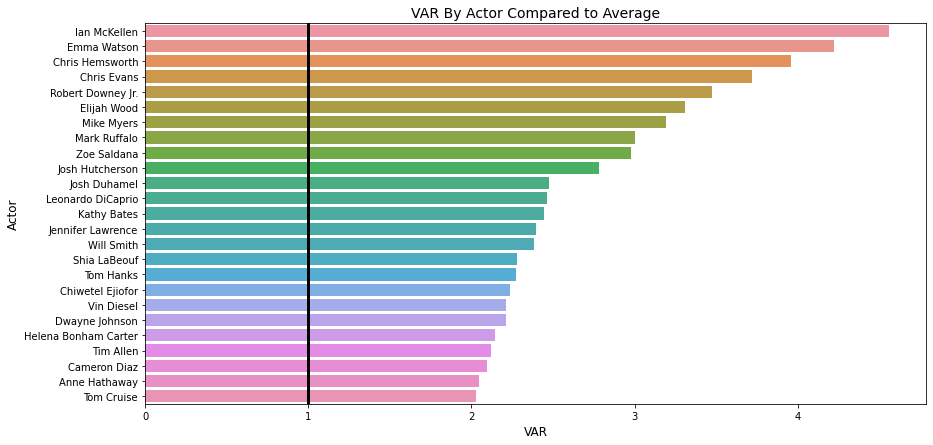

In [54]:
plt.figure(figsize=(14,7))
ax11 = sns.barplot(x=top_actors['VAR'], y=top_actors['value'])
plt.axvline(1, ls='-', color='black', linewidth=3)
plt.xlabel('VAR', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.title('VAR By Actor Compared to Average', fontsize=14)
plt.savefig('VARActor');

In [55]:
directors_df['Production Budget'] = (((2020-directors_df['Year'])*.0322)+1)*directors_df['Production Budget']
directors_df['Worldwide Gross'] = (((2020-directors_df['Year'])*.0322)+1)*directors_df['Worldwide Gross']
directors_df['Domestic Gross'] = (((2020-directors_df['Year'])*.0322)+1)*directors_df['Domestic Gross']

In [56]:
directors_df['Net Profit'] = directors_df['Worldwide Gross'] - directors_df['Production Budget']
directors_df['Profit Margin'] = directors_df['Net Profit'] / directors_df['Worldwide Gross']

In [57]:
director_counts = directors_df['value'].value_counts()
director_list = director_counts[director_counts >= 5].index.tolist()
directors_df = directors_df[directors_df['value'].isin(director_list)]

In [58]:
director_total = directors_df.groupby(['value'],  as_index=False)['Net Profit'].mean().sort_values(by='Net Profit', ascending=False)
director_total['VAR'] = (director_total['Net Profit']/actor_total['Net Profit'].mean())

In [59]:
top_directors = director_total.head(25)
top_directors

,value,Net Profit,VAR
78,James Cameron,1.244750e+09,8.447815
11,Anthony Russo,1.017389e+09,6.904774
89,Joe Russo,1.017389e+09,6.904774
115,Lee Unkrich,9.120679e+08,6.189982
148,Peter Jackson,8.218780e+08,5.577885
50,David Yates,6.881352e+08,4.670206
104,Jon Favreau,6.287041e+08,4.266861
129,Michael Bay,5.888046e+08,3.996073
96,John Lasseter,5.772545e+08,3.917686
31,Christopher Nolan,5.765089e+08,3.912625


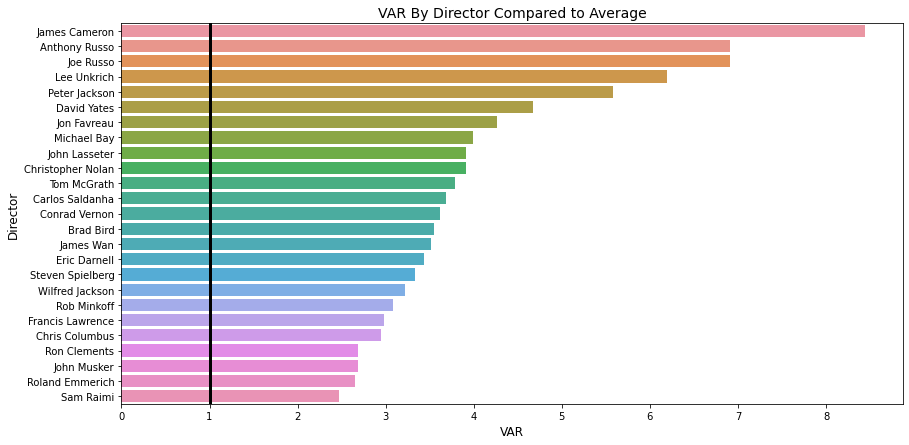

In [60]:
plt.figure(figsize=(14,7))
ax12 = sns.barplot(x=top_directors['VAR'], y=top_directors['value'])
plt.axvline(1, ls='-', color='black', linewidth=3)
plt.xlabel('VAR', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.title('VAR By Director Compared to Average', fontsize=14)
plt.savefig('VARDirector');

VAR 점수에서 1.0점 이상을 지속적으로 획득한 사람을 배우와 감독으로 기용해야 합니다.

# Q5: 아카데미상을 수상하려면 예산을 얼마나 사용해야 할까요?

In [61]:
imdb_budgets_df.set_index(['Movie','Year'], inplace=True)
awards_df.set_index(['film_name', 'film_year'], inplace=True)

In [62]:
budgets_and_awards = imdb_budgets_df.join(awards_df, how='inner', on=['Movie', 'Year'])
budgets_and_awards.head()

,,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month,awards_won,awards_nominated,win_rate
Movie,Year,,,,,,,,,,,,,,,,
Avatar,2009,7.8,PG-13,162,"[Action, Adventure, Fantasy]",2009-12-17,237000000,760507625,2788701337,2551701337,0.915014,336208200.0,3.619844e+09,December,3,9,0.333
Black Panther,2018,7.3,PG-13,134,"[Action, Adventure, Sci-Fi]",2018-02-13,200000000,700059566,1346103376,1146103376,0.851423,225760000.0,1.293721e+09,February,3,7,0.429
Titanic,1997,7.8,PG-13,194,"[Drama, Romance]",1997-12-18,200000000,659363944,2208208395,2008208395,0.909429,361000000.0,3.624816e+09,December,11,14,0.786
The Dark Knight,2008,9.0,PG-13,152,"[Action, Crime, Drama]",2008-07-11,185000000,533720947,1000742751,815742751,0.815137,268398000.0,1.183480e+09,July,2,8,0.250
Toy Story 4,2019,7.8,G,100,"[Animation, Adventure, Comedy]",2019-06-20,200000000,434038008,1073394813,873394813,0.813675,219320000.0,9.577648e+08,June,1,2,0.500


In [63]:
nominated_movies_df = budgets_and_awards.loc[budgets_and_awards['Profit'] > 0]

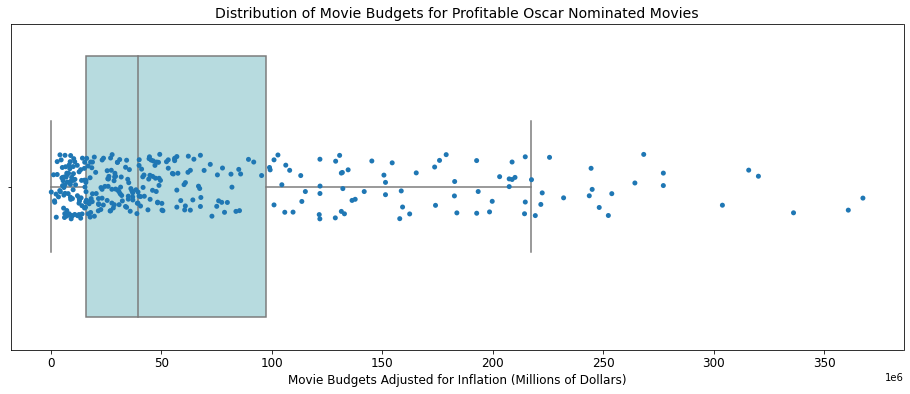

In [64]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Adjusted_Budget', data=nominated_movies_df, showfliers=False, color='powderblue')
sns.stripplot(x='Adjusted_Budget', data=nominated_movies_df)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.xticks(fontsize=12)
plt.xlabel('Movie Budgets Adjusted for Inflation (Millions of Dollars)', fontsize=12);
plt.title('Distribution of Movie Budgets for Profitable Oscar Nominated Movies', fontsize=14)
plt.savefig('Oscar_Nominated');

In [65]:
nominated_movies_df['Adjusted_Budget'].describe()

count    3.310000e+02
mean     6.937239e+07
std      7.597087e+07
min      2.224500e+05
25%      1.590762e+07
50%      3.945870e+07
75%      9.721680e+07
max      3.676200e+08
Name: Adjusted_Budget, dtype: float64

In [66]:
nominated_movies_df['win_rate'].describe()

count    330.000000
mean       0.448203
std        0.279846
min        0.000000
25%        0.250000
50%        0.392500
75%        0.600000
max        1.000000
Name: win_rate, dtype: float64

263


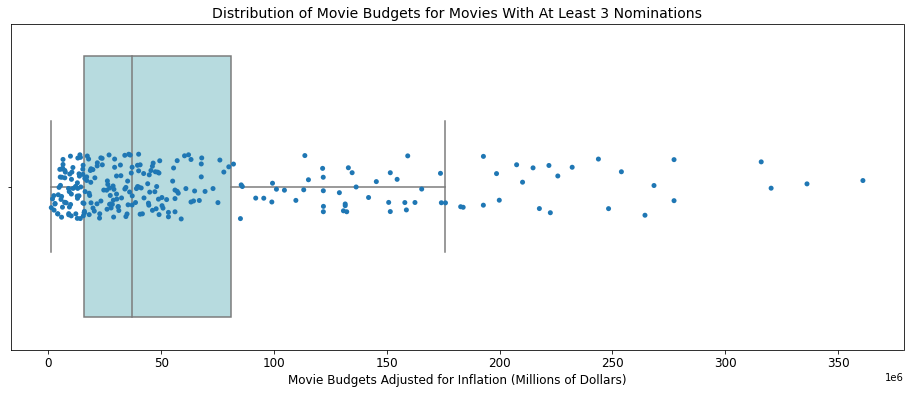

In [67]:
nominated_over_three = nominated_movies_df.loc[nominated_movies_df['awards_nominated'] >= 3]
print(len(nominated_over_three))
plt.figure(figsize=(16,6))
sns.boxplot(x=nominated_over_three['Adjusted_Budget'], showfliers=False, color='powderblue')
sns.stripplot(x='Adjusted_Budget', data=nominated_over_three)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.xticks(fontsize=12)
plt.xlabel('Movie Budgets Adjusted for Inflation (Millions of Dollars)', fontsize=12)
plt.title('Distribution of Movie Budgets for Movies With At Least 3 Nominations', fontsize=14)
plt.savefig('3_Nominations');

In [68]:
nominated_over_three['Adjusted_Budget'].describe()

count    2.630000e+02
mean     6.504528e+07
std      7.228366e+07
min      1.245920e+06
25%      1.593910e+07
50%      3.707500e+07
75%      8.096560e+07
max      3.610000e+08
Name: Adjusted_Budget, dtype: float64

**결론**

적어도 $ 35,465,000 이상은 투자해야 수상을 기대해볼 수 있습니다.

# Q6: 영화의 길이와 시청 등급은 평가에 영향을 미칠까요?

In [69]:
rating_counts = imdb_budgets_df['Rating'].value_counts()
rating_list = rating_counts[rating_counts >= 50].index.tolist()
rating_df = imdb_budgets_df[imdb_budgets_df['Rating'].isin(rating_list)]

In [70]:
rating_df = rating_df.reset_index()
rating_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month
0,Avengers: Endgame,2019,8.4,PG-13,181,"[Action, Adventure, Drama]",2019-04-23,400000000,858373000,2797800564,2397800564,0.857031,438640000.0,2.629428e+09,April
1,Avatar,2009,7.8,PG-13,162,"[Action, Adventure, Fantasy]",2009-12-17,237000000,760507625,2788701337,2551701337,0.915014,336208200.0,3.619844e+09,December
2,Black Panther,2018,7.3,PG-13,134,"[Action, Adventure, Sci-Fi]",2018-02-13,200000000,700059566,1346103376,1146103376,0.851423,225760000.0,1.293721e+09,February
3,Avengers: Infinity War,2018,8.4,PG-13,149,"[Action, Adventure, Sci-Fi]",2018-04-25,300000000,678815482,2048359754,1748359754,0.853541,338640000.0,1.973548e+09,April
4,Titanic,1997,7.8,PG-13,194,"[Drama, Romance]",1997-12-18,200000000,659363944,2208208395,2008208395,0.909429,361000000.0,3.624816e+09,December


In [71]:
rating_count = rating_df.groupby(['Rating'], as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)
rating_count

,Rating,Movie
3,R,1631
2,PG-13,1339
1,PG,590
0,G,93


In [72]:
rating_df2 = rating_df.groupby(['Rating'], as_index=False)[['Adjusted_Profit', 'Profit_Margin', 'IMDb']].median().sort_values(by='Adjusted_Profit', ascending=False)
rating_df2

,Rating,Adjusted_Profit,Profit_Margin,IMDb
0,G,1.579234e+08,0.760594,7.1
1,PG,7.870441e+07,0.617626,6.5
2,PG-13,5.180766e+07,0.546660,6.3
3,R,2.135315e+07,0.505431,6.6


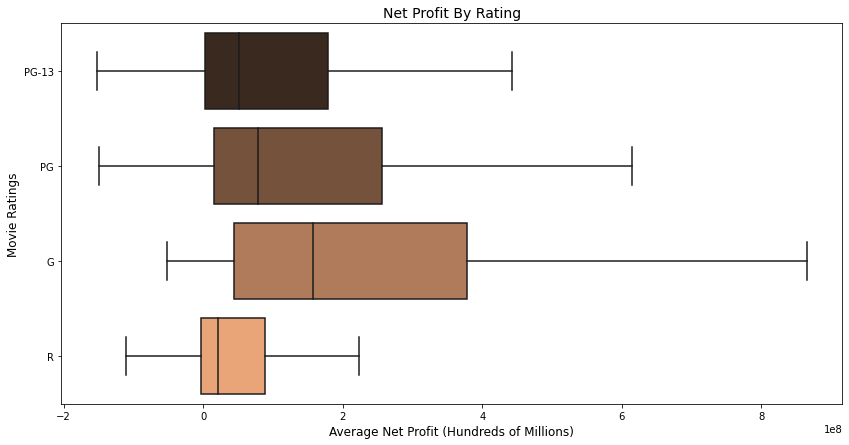

In [73]:
plt.figure(figsize=(14,7))
ax13 = sns.boxplot( y=rating_df["Rating"], x=rating_df["Adjusted_Profit"], showfliers=False, palette='copper')
plt.xlabel('Average Net Profit (Hundreds of Millions)', fontsize=12)
plt.ylabel('Movie Ratings', fontsize=12)
plt.title('Net Profit By Rating', fontsize=14)
plt.savefig('ProfitbyRating');

In [74]:
genre_rating_df = genre_budgets_df.drop(['Rating'], axis=1)
rating_df = rating_df.drop(['Genre'], axis=1)

In [75]:
genre_rating_df = pd.merge(genre_rating_df, rating_df)

In [76]:
Adv_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Adventure')]
Act_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Action')]
Com_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Comedy')]
Dra_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Drama')]
Sci_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Sci-Fi')]
Ani_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Animation')]

genre_concat = [Adv_df, Act_df, Com_df, Dra_df, Sci_df, Ani_df]
genre_rating = pd.concat(genre_concat)

In [77]:
gr_df = genre_rating.groupby(['Genre', 'Rating'],  as_index=False)['Adjusted_Profit'].sum().sort_values(by='Adjusted_Profit', ascending=False)
gr_pivoted = gr_df.pivot(index='Genre', columns='Rating', values='Adjusted_Profit')

In [78]:
gr_pivoted

Rating,G,PG,PG-13,R
Genre,,,,
Action,4.898857e+08,2.583492e+10,1.243024e+11,3.603055e+10
Adventure,1.821542e+10,7.813689e+10,1.198298e+11,1.115652e+10
Animation,2.125924e+10,4.921657e+10,7.145346e+08,1.270934e+08
Comedy,1.563482e+10,6.458929e+10,4.676112e+10,3.146580e+10
Drama,6.642067e+09,2.060405e+10,6.766494e+10,5.274027e+10
Sci-Fi,5.900238e+08,4.841381e+09,5.677866e+10,1.154834e+10


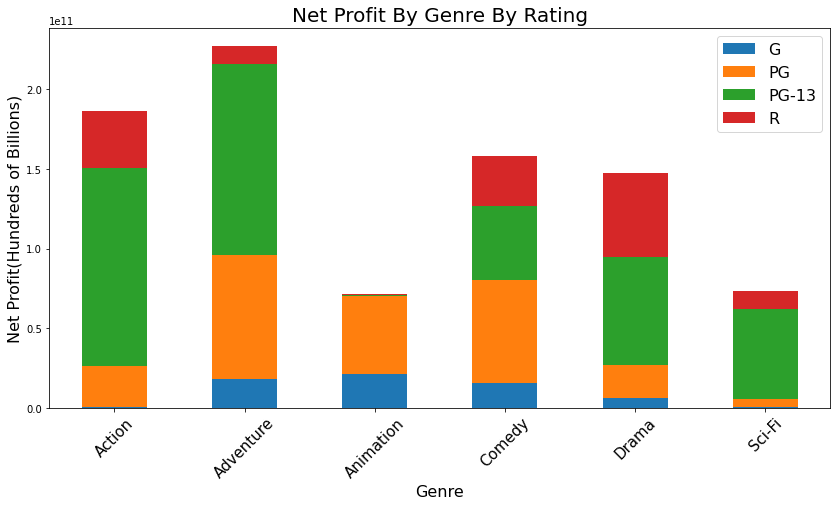

In [79]:
ax14 = gr_pivoted.plot(kind='bar', stacked=True, figsize=(14,7))
plt.legend(prop={'size': 16})
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Net Profit(Hundreds of Billions)', fontsize=16)
plt.title('Net Profit By Genre By Rating', fontsize=20)
plt.xticks(fontsize=15, rotation=45)
plt.savefig('ProfitbyGenrebyRating');

In [80]:
runtime_df = imdb_budgets_df[['Runtime', 'Adjusted_Profit', 'Profit_Margin']]
runtime_df

,,Runtime,Adjusted_Profit,Profit_Margin
Movie,Year,,,
Avengers: Endgame,2019,181,2.629428e+09,0.857031
Avatar,2009,162,3.619844e+09,0.915014
Black Panther,2018,134,1.293721e+09,0.851423
Avengers: Infinity War,2018,149,1.973548e+09,0.853541
Titanic,1997,194,3.624816e+09,0.909429
...,...,...,...,...
The Misfits,1961,125,1.244964e+07,0.512195
Judgment at Nuremberg,1961,179,2.074940e+07,0.700000
The Wrong Man,1956,105,2.500160e+06,0.400000


In [81]:
pearsoncorr = runtime_df.corr(method='pearson')
pearsoncorr

,Runtime,Adjusted_Profit,Profit_Margin
Runtime,1.000000,0.222528,0.051121
Adjusted_Profit,0.222528,1.000000,0.051070
Profit_Margin,0.051121,0.051070,1.000000


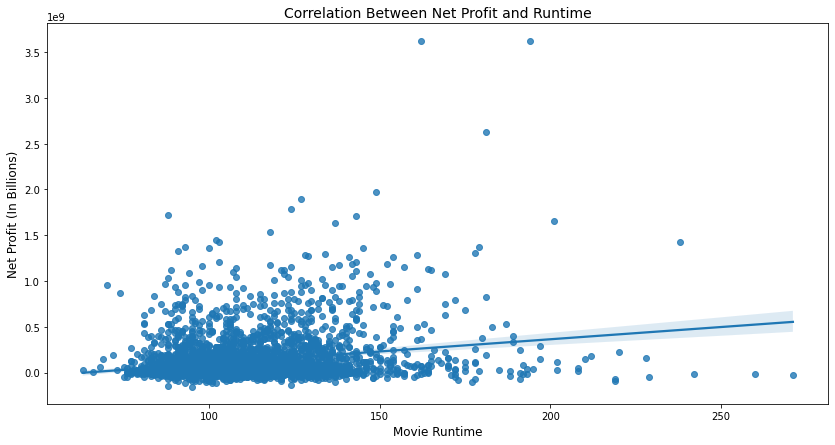

In [82]:
plt.figure(figsize=(14,7))
ax15 = sns.regplot(x='Runtime', y='Adjusted_Profit', data=imdb_budgets_df)
plt.xlabel('Movie Runtime', fontsize=12)
plt.ylabel('Net Profit (In Billions)', fontsize=12)
plt.title('Correlation Between Net Profit and Runtime', fontsize=14)
plt.savefig('CorrProfitRuntime');

**결론**
장르에 따라 시청 등급을 고려해야 합니다. 특히 애니메이션 장르의 경우 PG, G 등급으로 제작하는 것이 수익을 기대할 수 있습니다.

영화의 재생시간은 크게 수익과 관련이 없어 보입니다.

# Q7: 어떤 부분을 고려해야 영화 제작을 지속적으로 유지할 수 있을까요?

In [83]:
studiobudgets_df = pd.merge(studio_df, imdb_budgets_df, left_on = 'title', right_on='Movie') 
studiobudgets_df.head()

,title,studio,domestic_gross,foreign_gross,year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month
0,Toy Story 3,Buena Vista,415000000.0,652000000,2010,8.3,G,103,"[Animation, Adventure, Comedy]",2010-06-18,200000000,415004880,1068879522,868879522,0.812888,277280000.0,1.204615e+09,June
1,Inception,WB,292600000.0,535700000,2010,8.8,PG-13,148,"[Action, Adventure, Sci-Fi]",2010-07-16,160000000,292576195,832551961,672551961,0.807820,221824000.0,9.324260e+08,July
2,Shrek Forever After,Pixar/Dreamworks,238700000.0,513900000,2010,6.3,PG,93,"[Animation, Adventure, Comedy]",2010-05-21,165000000,238736787,756244673,591244673,0.781817,228756000.0,8.197016e+08,May
3,The Twilight Saga: Eclipse,Sumbadhat Productions,300500000.0,398000000,2010,5.0,PG-13,124,"[Adventure, Drama, Fantasy]",2010-06-30,68000000,300531751,706102828,638102828,0.903697,94275200.0,8.846658e+08,June
4,Iron Man 2,Paramount,312400000.0,311500000,2010,7.0,PG-13,124,"[Action, Adventure, Sci-Fi]",2010-05-07,170000000,312433331,621156389,451156389,0.726317,235688000.0,6.254832e+08,May


In [84]:
studiobudgets_df.drop(columns = {'title', 'domestic_gross', 'Domestic Gross', 'foreign_gross', 'year', 'Production Budget', 'Worldwide Gross', 'Profit'}, inplace = True)
studiobudgets_df.rename(columns = {'studio':'Studio','Worldwide Gross ':'Worldwide Gross' }, inplace = True) 
studiobudgets_df.head()

,Studio,IMDb,Rating,Runtime,Genre,Release Date,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month
0,Buena Vista,8.3,G,103,"[Animation, Adventure, Comedy]",2010-06-18,0.812888,277280000.0,1.204615e+09,June
1,WB,8.8,PG-13,148,"[Action, Adventure, Sci-Fi]",2010-07-16,0.807820,221824000.0,9.324260e+08,July
2,Pixar/Dreamworks,6.3,PG,93,"[Animation, Adventure, Comedy]",2010-05-21,0.781817,228756000.0,8.197016e+08,May
3,Sumbadhat Productions,5.0,PG-13,124,"[Adventure, Drama, Fantasy]",2010-06-30,0.903697,94275200.0,8.846658e+08,June
4,Paramount,7.0,PG-13,124,"[Action, Adventure, Sci-Fi]",2010-05-07,0.726317,235688000.0,6.254832e+08,May


In [85]:
profit_by_studiodf = studiobudgets_df.groupby('Studio').median()
profit_by_studiodf = profit_by_studiodf.reset_index()                                        
profit_by_studiodf = profit_by_studiodf.nlargest(25, 'Adjusted_Profit')
profit_by_studiodf

,Studio,IMDb,Runtime,Profit_Margin,Adjusted_Budget,Adjusted_Profit
51,UTV,8.45,141.5,0.958798,35824200.0,7.344018e+08
37,Pixar/Dreamworks,6.70,94.0,0.716170,191690000.0,5.164256e+08
9,Buena Vista,7.10,117.0,0.667056,186225000.0,2.028614e+08
28,MBox,7.80,158.0,0.624019,121878000.0,2.022822e+08
48,Strand,6.50,112.0,0.741792,53694000.0,1.542548e+08
45,Sony,6.30,105.0,0.658692,69405000.0,1.362788e+08
35,Paramount,6.40,110.0,0.639187,56080400.0,1.345179e+08
20,Fox,6.35,106.0,0.644465,69262800.0,1.232610e+08
52,Universal,6.20,108.0,0.686945,50304000.0,1.138462e+08
54,WB,6.60,113.5,0.542261,70456000.0,8.462657e+07


In [86]:
profit_by_studiodf.describe()

,IMDb,Runtime,Profit_Margin,Adjusted_Budget,Adjusted_Profit
count,25.00000,25.000000,25.000000,2.500000e+01,2.500000e+01
mean,6.76600,112.180000,0.663049,5.144960e+07,1.196157e+08
std,0.64108,16.751169,0.122761,4.854152e+07,1.647020e+08
min,5.80000,94.000000,0.446140,2.983000e+06,1.664458e+07
25%,6.35000,103.500000,0.600112,2.302140e+07,3.548047e+07
50%,6.60000,108.000000,0.658692,3.483000e+07,5.265253e+07
75%,7.10000,112.000000,0.716170,5.608040e+07,1.345179e+08
max,8.45000,160.000000,0.958798,1.916900e+08,7.344018e+08


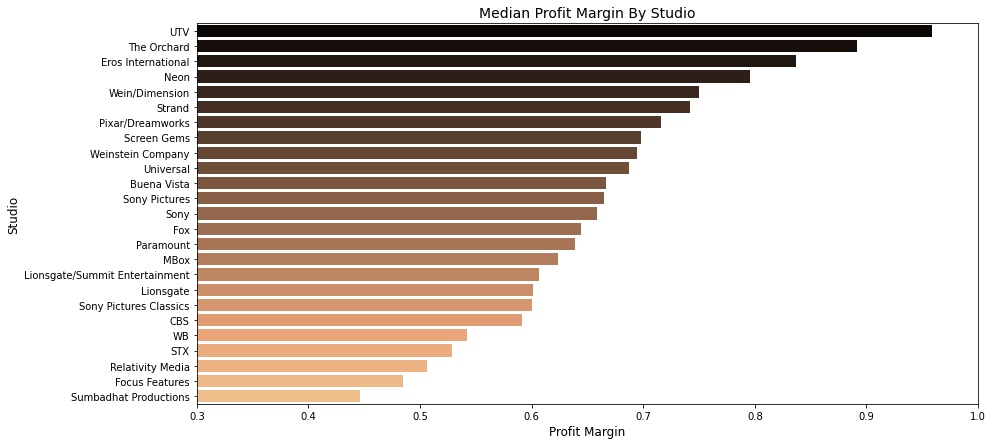

In [87]:
plt.figure(figsize=(14,7))
ax16 = sns.barplot(x=profit_by_studiodf['Profit_Margin'], y=profit_by_studiodf['Studio'],
                   order=profit_by_studiodf.sort_values('Profit_Margin', ascending=False).Studio, palette='copper')
plt.xlabel('Profit Margin', fontsize=12)
plt.ylabel('Studio', fontsize=12)
plt.title('Median Profit Margin By Studio', fontsize=14)
plt.xlim(0.3, 1.0)
plt.savefig('ProfitMarginStudio')

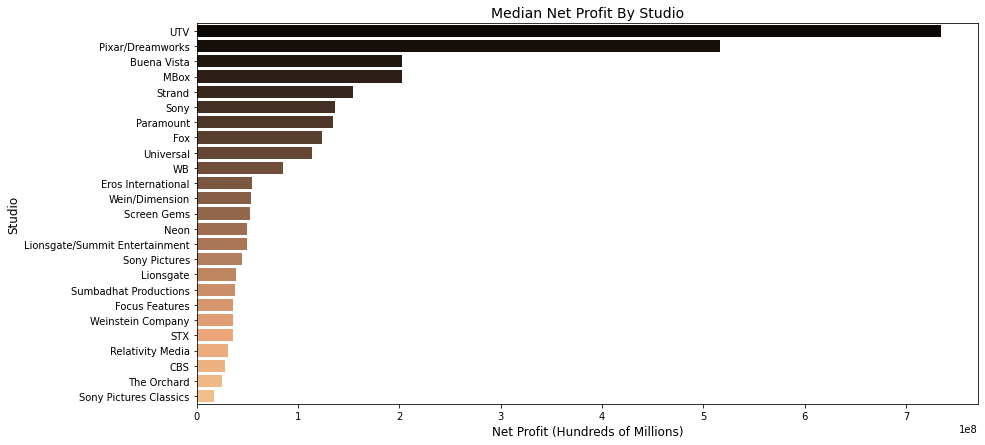

In [88]:
plt.figure(figsize=(14,7))
ax16 = sns.barplot(y=profit_by_studiodf['Studio'], x=profit_by_studiodf['Adjusted_Profit'], palette='copper')
plt.xlabel('Net Profit (Hundreds of Millions)', fontsize=12)
plt.ylabel('Studio', fontsize=12)
plt.title('Median Net Profit By Studio', fontsize=14)
plt.savefig('NetProfitStudio');

**결론**

많은 성공을 거둔 스튜디오와 경쟁하기 위해서는 한 편당 66%의 마진과 5천 만 달러 정도의 순이익을 목표로 해야 합니다.

# Q8: 어떤 기업을 레퍼런스로 삼아야 할까요?

In [89]:
theaters_df['dollars_per_theater'] = theaters_df['total_dom_gross($)'] / theaters_df['max_theaters']
theaters_df.head()

,title,max_theaters,year,total_dom_gross($),studio,dollars_per_theater
0,The Lion King,4802,2019,543638043,Disney,113210.754477
1,Avengers: Endgame,4662,2019,858373000,Disney,184121.192621
2,Spider-Man: Far from Home,4634,2019,390532085,Sony,84275.374407
3,Toy Story 4,4575,2019,434038008,Disney,94871.695738
4,It Chapter Two,4570,2019,211593228,Warner Bros.,46300.487527


In [90]:
average_theaters = theaters_df.groupby('studio').mean()
average_theaters_ranked = average_theaters.sort_values(by=['studio'],ascending=False)
average_theaters_ranked.reset_index(inplace=True)
average_theaters

,max_theaters,year,total_dom_gross($),dollars_per_theater
studio,,,,
Disney,3682.319728,2010.591837,2.026179e+08,51856.141904
DreamWorks Distribution,3408.263158,2002.947368,1.181983e+08,33102.055326
Lionsgate,3356.244898,2014.469388,9.526829e+07,26485.343053
Metro-Goldwyn-Mayer (MGM),3259.142857,2004.000000,7.843758e+07,23829.208308
New Line Cinema,3410.571429,2001.857143,2.497181e+08,72518.242699
Paramount Pictures,3466.705357,2010.714286,1.086149e+08,30508.472763
Sony,3478.355556,2010.562963,1.166779e+08,32626.668858
TriStar Pictures,3146.000000,2014.000000,8.070322e+07,25546.753029
Twentieth Century Fox,3493.975758,2011.212121,1.110098e+08,31119.138124


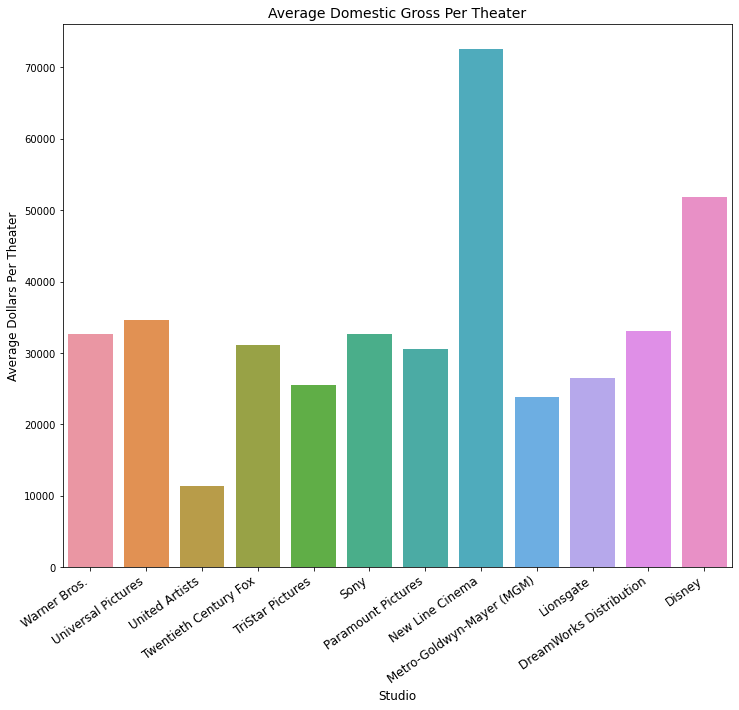

In [91]:
plt.figure(figsize=(12,10))
ax16 = sns.barplot(x='studio', y='dollars_per_theater', data=average_theaters_ranked)
plt.xlabel('Studio', fontsize=12)
plt.title("Average Domestic Gross Per Theater", fontsize=14);
plt.ylabel('Average Dollars Per Theater', fontsize=12);
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.savefig('DomesticPerTheater');

In [92]:
theaters_df['studio'].value_counts()

Warner Bros.                 208
Twentieth Century Fox        165
Disney                       147
Universal Pictures           136
Sony                         135
Paramount Pictures           112
Lionsgate                     49
DreamWorks Distribution       19
Metro-Goldwyn-Mayer (MGM)     14
New Line Cinema                7
TriStar Pictures               7
United Artists                 1
Name: studio, dtype: int64

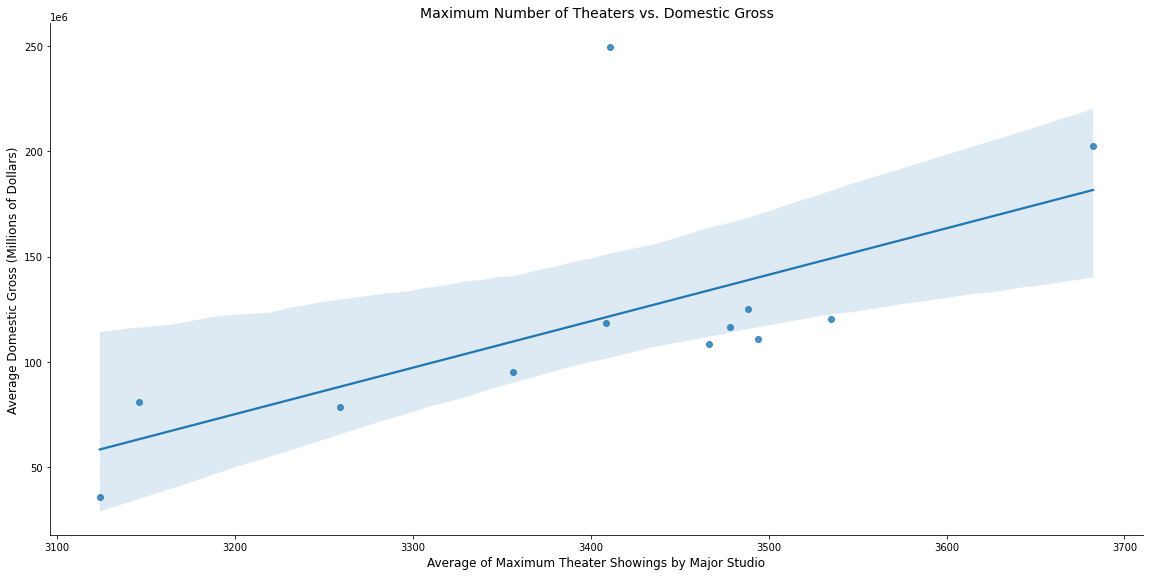

In [93]:
ax17 = sns.lmplot(x='max_theaters', y='total_dom_gross($)', data=average_theaters, height=8, aspect=2)
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
plt.xlabel('Average of Maximum Theater Showings by Major Studio', fontsize=12)
plt.ylabel('Average Domestic Gross (Millions of Dollars)', fontsize=12)
plt.title('Maximum Number of Theaters vs. Domestic Gross', fontsize=14)
plt.savefig('TheatersVGross');

In [94]:
theaters_df.set_index(['title', 'year'], inplace=True)

In [95]:
theaters_and_awards = theaters_df.join(awards_df, how='inner', on=['title', 'year'])

In [96]:
theaters_and_awards.groupby('studio').count()

,max_theaters,total_dom_gross($),dollars_per_theater,awards_won,awards_nominated,win_rate
studio,,,,,,
Disney,22,22,22,22,22,22
DreamWorks Distribution,4,4,4,4,4,4
New Line Cinema,2,2,2,2,2,2
Paramount Pictures,7,7,7,7,7,7
Sony,6,6,6,6,6,6
Twentieth Century Fox,4,4,4,4,4,4
Universal Pictures,6,6,6,6,6,6
Warner Bros.,15,15,15,15,15,15


In [97]:
theaters_and_awards.groupby('studio').mean()

,max_theaters,total_dom_gross($),dollars_per_theater,awards_won,awards_nominated,win_rate
studio,,,,,,
Disney,3818.727273,3.052172e+08,78797.606486,1.363636,3.000000,0.599045
DreamWorks Distribution,3444.250000,1.532236e+08,44447.628709,2.000000,4.250000,0.604250
New Line Cinema,3662.500000,3.584086e+08,97814.750337,6.500000,8.500000,0.666500
Paramount Pictures,3564.857143,1.408354e+08,38930.819127,1.000000,3.714286,0.451143
Sony,3653.666667,2.378423e+08,64720.228079,1.166667,3.166667,0.538833
Twentieth Century Fox,3501.750000,1.368749e+08,38404.788199,2.250000,6.000000,0.425000
Universal Pictures,3338.833333,1.493447e+08,44970.820343,1.333333,3.333333,0.505500
Warner Bros.,3831.600000,2.340559e+08,60023.038417,2.666667,5.866667,0.557400


**결론**

디즈니를 레퍼런스로 삼고 사업 모델을 결정해야 합니다.